# Section 1: Pytorch Workflow Fundamentals

## What we are covering:

| Topic | Contents |
|-------|----------|
| 1. Getting data ready | Data can be almost anything but to get started we're going to create a simple straight line |
| 2. Building a model | Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop. |
| 3. Fitting the model to data (training) | We've got data and a model, now let's let the model (try to) find patterns in the (training) data. |
| 4. Making predictions and evaluating a model (inference) | Our model's found patterns in the data, let's compare its findings to the actual (testing) data. |
| 5. Saving and loading a model | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| 6. Putting it all together | Let's take all of the above and combine it. |

# 1. Data (Preparing and Loading)

Machine learning is a game of two parts:

1. Turn your data, whatever it is, into numbers (representation via numerical encoding)
2. Pick or build a model to learn the representation as best as possible.

In [1]:
## Imports

import torch
from torch import nn ## nn contains all the Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check torch version
torch.__version__

'2.6.0+cpu'

In [2]:
# Create * Known * parameters
weight = 0.7
bias = 0.3

# Create Data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) #making this a col vector
y = weight* X + bias

X[:20], X.shape, y[:20], y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]),
 torch.Size([50, 1]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660]]),
 torch.Size([50, 1]))

### Split Data into training and testing sets (can further separate into validation and test sets)

| Split           | Purpose                                                                 | Amount of total data | How often is it used? |
|-----------------|------------------------------------------------------------------------|---------------------|----------------------|
| Training set    | The model learns from this data (like the course materials you study during the semester). | ~60-80%             | Always               |
| Validation set  | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20%             | Often but not always |
| Testing set     | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20%             | Always               |

In [3]:
# Create Train/Test split

train_split = int(0.8 * len(X)) #80% of the data is used for training
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data= X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    """Plots training data, test data and compares precitions
    """
    plt.figure(figsize=(10,7))

    #Plot the training data in blue
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training Data')

    #Plot the test data in green
    plt.scatter(test_data, y_test, s = 4, c = 'g', label = 'Testing Data')

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Predictions')

    # Show the legend
    plt.legend(prop = {'size': 14})

    pass

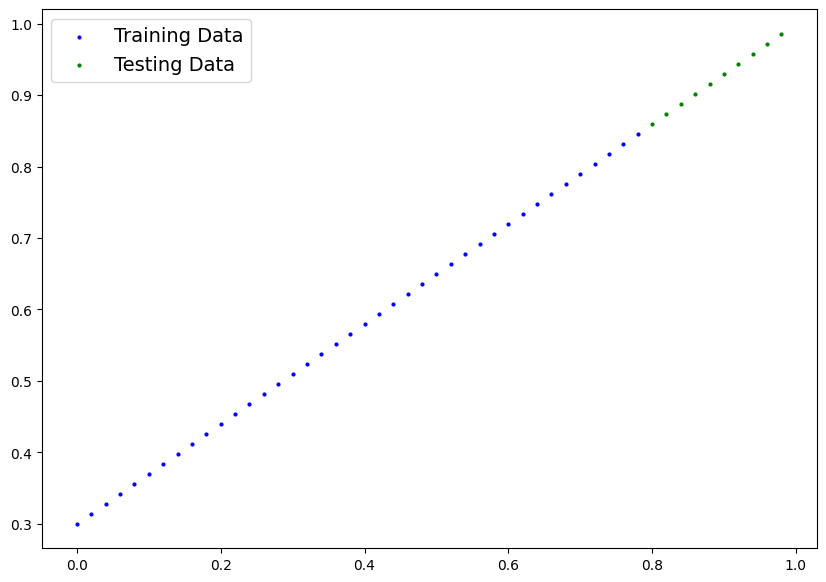

In [5]:
plot_predictions()

> **Note:** Now's a good time to introduce you to the data explorer's motto...  
> **"Visualize, visualize, visualize!"**
>
> Think of this whenever you're working with data and turning it into numbers—if you can visualize something, it can do wonders for understanding.
>
> Machines love numbers and we humans like numbers too, but we also like to look at things.


## 2: Build Model

In [6]:
# Create a Linear Regression model using pure Pytorch

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,  # Start with random weights from a normal distributions
                                    dtype=torch.float32, # pytorch loves float32 by default
                                    requires_grad=True
                                    ))
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad=True))

        #Forward defines the computation in the model

    def forward(self, x):
        return self.weight * x + self.bias
        
    

### Pytorch model building essentials
#### Four Essential Modules

1. **torch.nn**  
2. **torch.optim**  
3. **torch.utils.data.Dataset**  
4. **torch.utils.data**

| PyTorch module         | What does it do?                                                                                                                                                                                                 |
|-----------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `torch.nn`            | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).                                                                                |
| `torch.nn.Parameter`  | Stores tensors that can be used with `nn.Module`. If `requires_grad=True`, gradients (used for updating model parameters via gradient descent) are calculated automatically—this is often referred to as "autograd". |
| `torch.nn.Module`     | The base class for all neural network modules; all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method to be implemented. |
| `torch.optim`         | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss).                                 |
| `def forward()`       | All `nn.Module` subclasses require a `forward()` method; this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g., the linear regression formula above).         |

In [7]:
# Checking the contents of a Pytorch model

# Set manual seed since nn.Parameter are randomly initialised

torch.manual_seed(seed = 42)

# Create an instance of the linear model
model_0 = LinearRegressionModel()

# Check the nn.Parameters()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


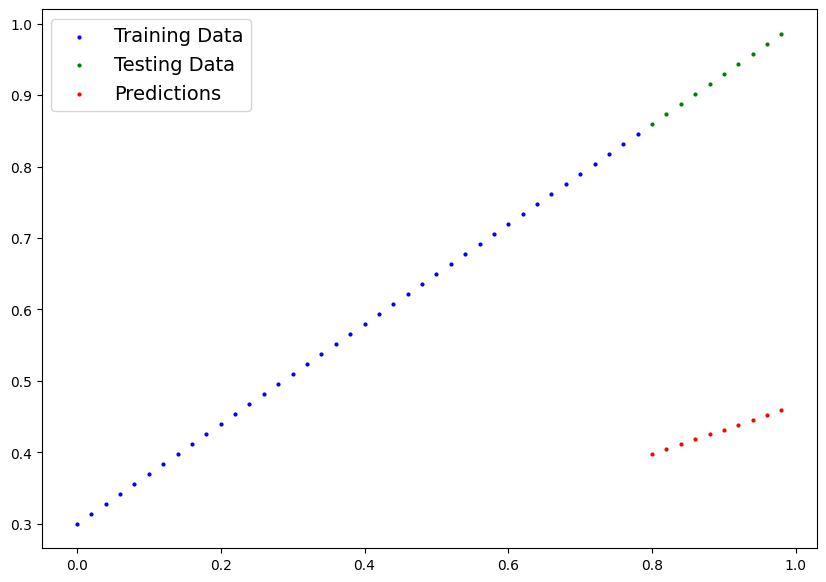

In [9]:
# Making predictions using torch.inference_mode()

# Make Predictions with model
with torch.inference_mode(): # with this condition or state being true, run the following code
    y_preds = model_0(X_test)

print(y_preds)
plot_predictions(predictions = y_preds)


In [10]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [11]:
absolute_error = abs(y_test - y_preds)
print(absolute_error.sum())

tensor(4.9454)


The predicitons are not doing so well. This is because the weights of the NN model are only randomly initalised and have not seen and calibrated to the training data

## 3. Train Model

### Creating a Loss Function and Optimizer in PyTorch

| Function      | What does it do?                                                                                   | Where does it live in PyTorch?                  | Common values                                                                                   |
|---------------|---------------------------------------------------------------------------------------------------|-------------------------------------------------|-------------------------------------------------------------------------------------------------|
| Loss function | Measures how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower is better. | `torch.nn`                                      | Mean absolute error (MAE) for regression problems (`torch.nn.L1Loss()`), binary cross entropy for binary classification problems (`torch.nn.BCELoss()`) |
| Optimizer     | Tells your model how to update its internal parameters to best lower the loss.                     | `torch.optim`                                   | Stochastic gradient descent (`torch.optim.SGD()`), Adam optimizer (`torch.optim.Adam()`)         |


In [12]:
# we use L1 (MAE) Loss

loss_fn = torch.nn.L1Loss()

# we use Stochastic Gradient Descent (SGD) as our optimzers

optimizer = torch.optim.SGD(params = model_0.parameters(), 
                            lr = 0.01)


### Creatinng an optimization loop in Pytorch

1. **Training Loop**
2. **Testing Loop**
3. **Repeat...**

---

### PyTorch Training Loop Steps

| Number | Step name                        | What does it do?                                                                                                                                      | Code example                                 |
|--------|----------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------|
| 1      | Forward pass                     | The model goes through all of the training data once, performing its `forward()` function calculations.                                               | `model(x_train)`                             |
| 2      | Calculate the loss               | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.                                           | `loss = loss_fn(y_pred, y_train)`            |
| 3      | Zero gradients                   | The optimizer's gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.               | `optimizer.zero_grad()`                      |
| 4      | Perform backpropagation on loss  | Computes the gradient of the loss with respect to every model parameter to be updated (each parameter with `requires_grad=True`). This is backprop.   | `loss.backward()`                            |
| 5      | Update the optimizer (gradient descent) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them.                                  | `optimizer.step()`                           |

In [13]:
# Using Ipython Display
from IPython.display import Image, display
display(Image(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-optimization-loop-song.png"))

In [14]:
torch.manual_seed(seed= 42)

#no of epochs
epochs = 100

## Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs): 
    # Put the model in training mode (default state of the model)

    model_0.train()

    #1 : Forward Pass with gradients accumalated
    y_preds = model_0(X_train)

    #2: Compute the loss

    loss =  loss_fn(y_train, y_preds)

    #3. Zero grad of the optimizer

    optimizer.zero_grad()

    #4 .Loss Backwards

    loss.backward()

    #5. Progress the optimizer
    
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


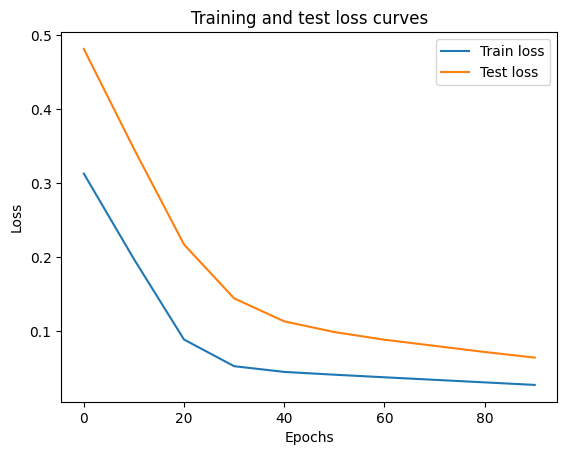

In [15]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [16]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weight': tensor([0.5784]), 'bias': tensor([0.3513])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [17]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")


The model learned the following values for weights and bias:
OrderedDict({'weight': tensor([0.5784]), 'bias': tensor([0.3513])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [21]:
# 1. Set the model in evaluation mode
model_0.eval()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

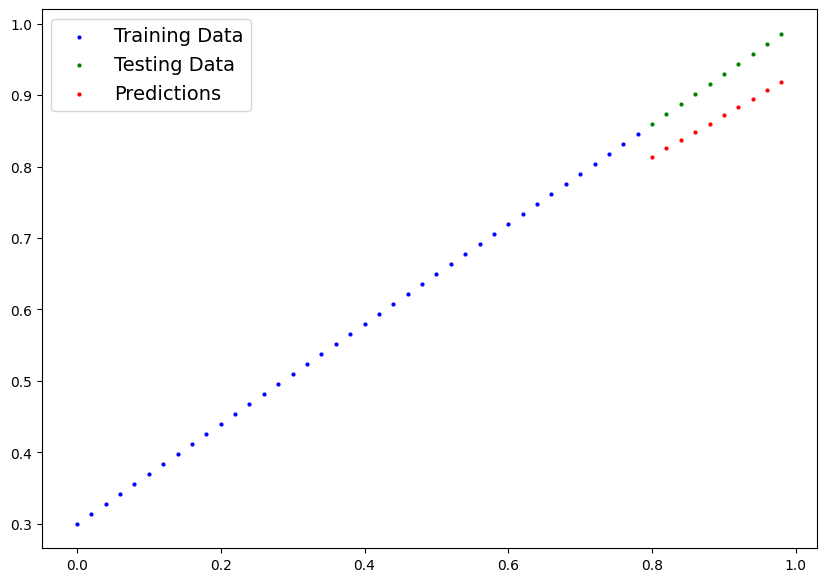

In [22]:
plot_predictions(predictions = y_preds)

## Saving and Loading a Pytorch Model
| PyTorch method                        | What does it do?                                                                                                                                                                                                                      |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `torch.save`                          | Saves a serialized object to disk using Python's pickle utility. Models, tensors, and various other Python objects like dictionaries can be saved using `torch.save`.                                                                 |
| `torch.load`                          | Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors, or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU, etc).                      |
| `torch.nn.Module.load_state_dict`      | Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object.                                                                                                                                      |

### Saving a PyTorch model's state_dict()

The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict().

Let's see how we can do that in a few steps:

1. We'll create a directory for saving models to called models using Python's pathlib module.
2. We'll create a file path to save the model to.
3. We'll call torch.save(obj, f) where obj is the target model's state_dict() and f is the filename of where to save the model.


In [23]:
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3, Save the model state dict
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)


Saving model to models/01_pytorch_workflow_model_0.pth


In [24]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth


-rw-rw-rw- 1 codespace codespace 1680 Jun  5 14:01 models/01_pytorch_workflow_model_0.pth


## Loading a saved Pytorch model's state_dict()

In [25]:
# Instantiate a new instance of our model (will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model 
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [27]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [29]:
# set to eval mode 
loaded_model_0.eval()

# inference mode
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # Perform a forward pass on the test data
loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [30]:
# Compare previous model predictions with loaded model predictions
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

In [31]:
# Import PyTorch and matplotlib

import torch
from torch import nn 
import matplotlib.pyplot as plt

%matplotlib inline

#Check Pytorch version
torch.__version__

'2.6.0+cpu'

In [32]:
# Device agnositc code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


In [33]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [34]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

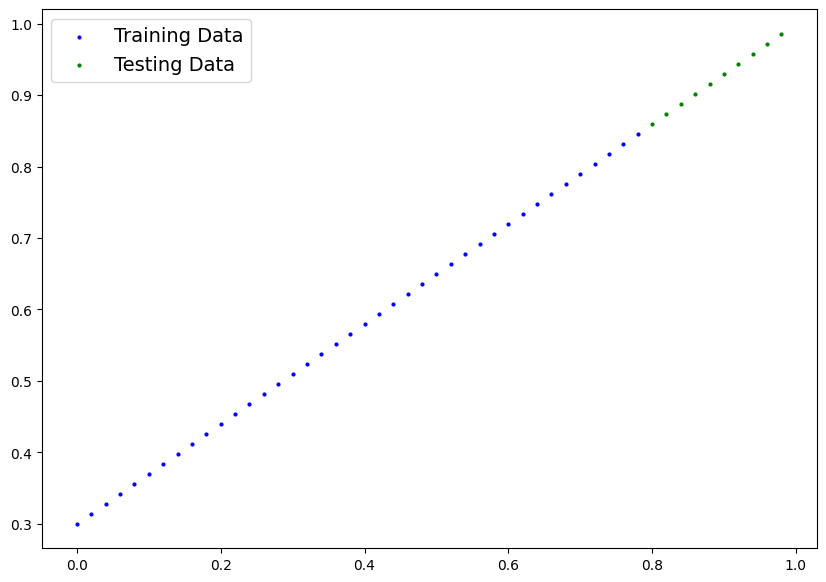

In [35]:
# Note: If you've reset your runtime, this function won't work, 
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

In [36]:
# Subclass nn.modules

class LinearRegressionModelV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        #use nn.Linear() for creating model parameters
        self.linear_layer = nn.Linear(in_features= 1, out_features=1) 
        # in_features is the number of dimensions your input data has
        # out_features is the number of dimensions you'd like it to be output to

    # Define the forward computation (input data x flows through nn.Linear() )
    def forward(self, x):
        return self.linear_layer(x)

In [37]:
# Set the manula seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [40]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [41]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

### Training

In [42]:
# Create Loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), 
                            lr = 0.01)

In [43]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


> **Note:**  
> Due to the random nature of machine learning, you will likely get slightly different results (different loss and prediction values) depending on whether your model was trained on CPU or GPU. This is true even if you use the same random seed on either device.  
> If the difference is large, you may want to look for errors. However, if it is small (ideally it is), you can ignore it.

In [44]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [45]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

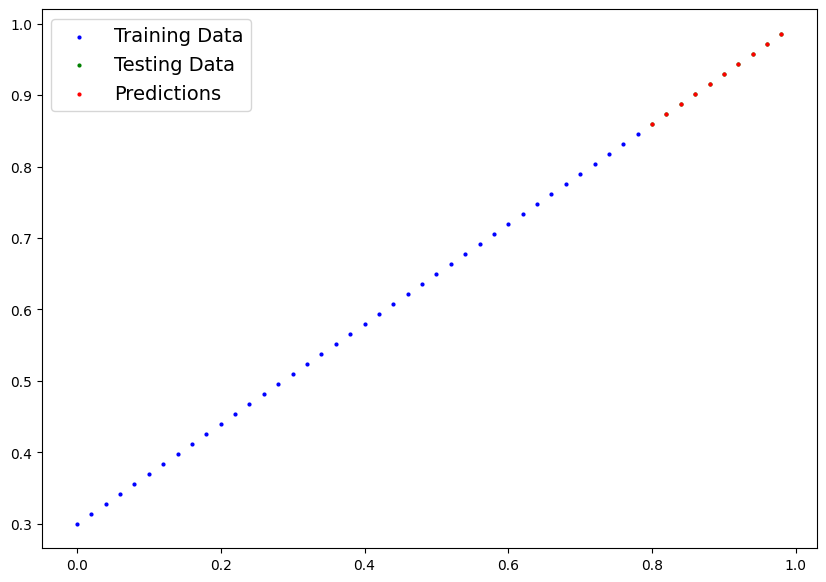

In [46]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

In [47]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


In [48]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


In [50]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [51]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])